<a href="https://colab.research.google.com/github/Nehal1920/Netflix-stock-price-prediction/blob/main/Netflix_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



# Stock price prediction

In [13]:
#load data
from google.colab import files
uploaded=files.upload()


Saving NFLX.csv to NFLX.csv


In [14]:
#store data into a data frame
df=pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-25,458.859985,467.010010,454.000000,465.910004,465.910004,4134500
1,2020-06-26,466.390015,468.029999,442.239990,443.399994,443.399994,6804700
2,2020-06-29,445.230011,447.670013,432.140015,447.239990,447.239990,4844000
3,2020-06-30,450.019989,457.589996,447.000000,455.040009,455.040009,4198500
4,2020-07-01,454.000000,488.230011,454.000000,485.640015,485.640015,9705900
5,2020-07-02,485.640015,492.279999,475.529999,476.890015,476.890015,6351500


In [15]:
#get number of trading days
df.shape

(252, 7)

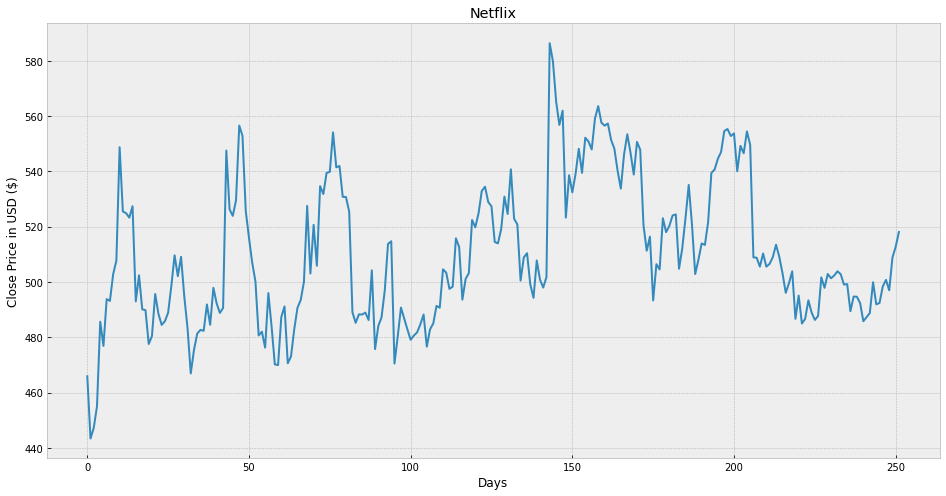

In [17]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.show()


In [19]:
#get the close price
df=df[['Close']]
df.head(4)

,Close
0,465.910004
1,443.399994
2,447.239990
3,455.040009


In [21]:
#create a variable to predict x days out into the future
future_days=25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] =df[['Close']].shift(-future_days)
df.head(4)
df.tail(4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
248,497.000000,NaN
249,508.820007,NaN
250,512.739990,NaN
251,518.059998,NaN


In [24]:
#create the feature data set (X) and convert it to numpy array and remove the last 'x' rows/days
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[465.910004]
 [443.399994]
 [447.23999 ]
 [455.040009]
 [485.640015]
 [476.890015]
 [493.809998]
 [493.160004]
 [502.779999]
 [507.76001 ]
 [548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.100006]
 [489.820007]
 [477.579987]
 [480.450012]
 [495.649994]
 [488.51001 ]
 [484.480011]
 [485.799988]
 [488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.730011]
 [483.380005]
 [466.929993]
 [475.470001]
 [481.329987]
 [482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.170013]
 [470.609985]
 [473.079987]
 [482.880005]
 [490.649994]
 [493.480011]
 [500.029999]
 [527.51001 ]
 [503.059998]
 [520.650024]
 [505.

In [25]:
#create the target dataset y and convert it to a numpy array and get all of the target values except last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)


[488.880005 498.619995 509.640015 502.109985 509.079987 494.730011
 483.380005 466.929993 475.470001 481.329987 482.679993 482.350006
 491.869995 484.529999 497.899994 492.309998 488.809998 490.579987
 547.530029 526.27002  523.890015 529.559998 556.549988 552.840027
 525.75     516.049988 507.019989 500.190002 480.670013 482.029999
 476.26001  495.98999  483.859985 470.200012 469.959991 487.350006
 491.170013 470.609985 473.079987 482.880005 490.649994 493.480011
 500.029999 527.51001  503.059998 520.650024 505.869995 534.659973
 531.789978 539.440002 539.809998 554.090027 541.450012 541.940002
 530.789978 530.719971 525.419983 489.049988 485.230011 488.279999
 488.23999  488.929993 486.23999  504.209991 475.73999  484.119995
 487.220001 496.950012 513.76001  514.72998  470.5      480.23999
 490.76001  486.769989 482.839996 479.100006 480.630005 481.790009
 484.670013 488.23999  476.619995 482.880005 485.       491.359985
 490.700012 504.579987 503.380005 497.519989 498.309998 515.780

In [26]:
#Split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [29]:
#create the model
# decision tree regressor model
tree=DecisionTreeRegressor().fit(x_train,y_train)
#create the linear regression model
lr=LinearRegression().fit(x_train,y_train)


In [30]:
#get the last x rows of the feature data set
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[549.219971],
       [546.539978],
       [554.440002],
       [549.570007],
       [508.899994],
       [508.779999],
       [505.549988],
       [510.299988],
       [505.549988],
       [506.519989],
       [509.      ],
       [513.469971],
       [509.109985],
       [503.179993],
       [496.079987],
       [499.549988],
       [503.839996],
       [486.690002],
       [495.079987],
       [484.980011],
       [486.660004],
       [493.369995],
       [488.940002],
       [486.279999],
       [487.700012]])

In [32]:
#show the model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)


[501.339996 539.419983 486.660004 501.339996 502.359985 503.859985
 499.23999  557.280029 499.23999  489.429993 482.029999 494.660004
 482.029999 485.809998 525.419983 488.769989 498.309998 491.899994
 492.410004 522.859985 491.899994 497.       508.820007 497.519989
 518.059998]

[518.4890486  518.13469713 519.17924652 518.53533072 513.15789931
 513.14203344 512.71495803 513.34300797 512.71495803 512.84321257
 513.1711222  513.76214642 513.18566453 512.40159482 511.46282465
 511.92163179 512.48886111 510.22127107 511.33060361 509.99517428
 510.2173047  511.10450669 510.51876841 510.16706004 510.35481564]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


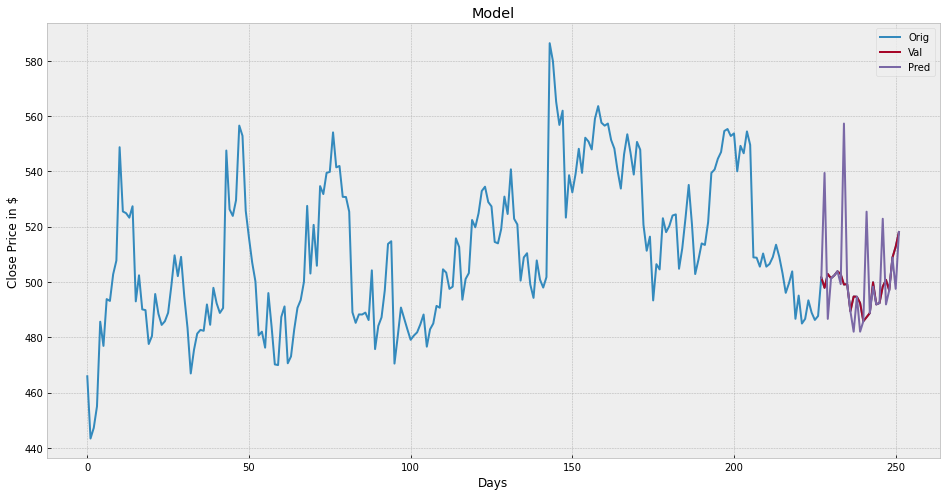

In [36]:
#visualize the data
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in $')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


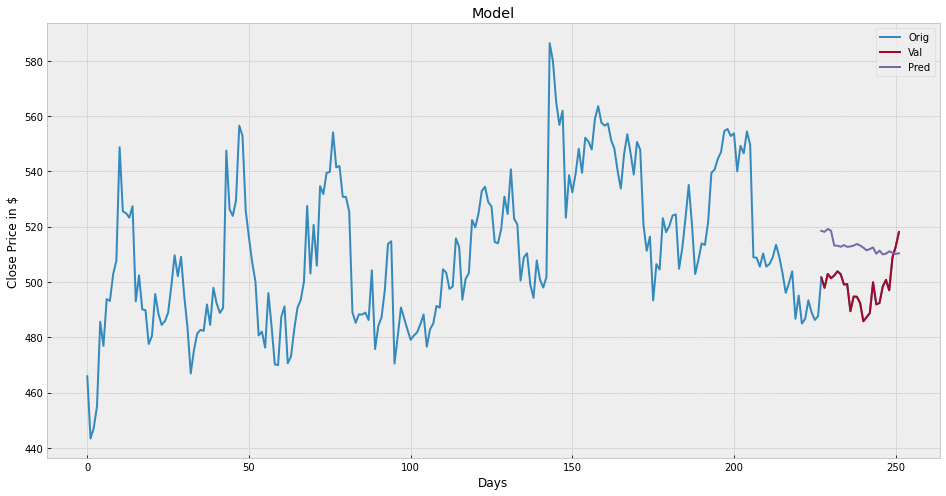

In [37]:
#visualize the data
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in $')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()